# Case Study: Activity Rate vs Unemployment Rate in Argentina

## Introduction
#### Hello everyone and welcome to my first job using R, in this time as a Case Study for the Data Analyst´s Certificate by Google. 

#### Today we are going to analyze two databases (Activity Rate and Unemployment Rate) from Argentina with data between 2004 and 2021. Both tables were extracted from Argentine government databases: INDEC and datos.gob.ar.

#### First I will analyze both tables separately to see their behavior over time, and after that I am going to join both tables, I will draw a scatter plot and I will calculate the Pearson correlation in order to answer the hypothesis of the work: Activity Rate and Unemployment Rate are negatively related.

In [1]:
##Importing libraries and datasets
library(tidyverse)
library(lubridate)

activity_rate <- read_csv("../input/emaevaloresanualesindicebase2004mensual/emae-valores-anuales-indice-base-2004-mensual.csv")
unemployment_rate <- read_csv("../input/tasadesempleovaloresanuales/tasa-desempleo-valores-anuales.csv")


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.4     ✔ purrr   0.3.4
✔ tibble  3.1.2     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union



── Column specification ────────────────────────────────────────────────────────
cols(
  indice_tiempo = col_date(format = ""),
  emae_original = col_double(),
  emae_desestacionalizada = col_double(),
  emae_tendencia_ciclo = col_double(),
  emae_original_via = col_double(),
  emae_desestacionalizada_vm = col_double(),
  emae_tendencia_ciclo_vm = col_double()
)



── Column specification ────────────────────────────────────────────────────────
cols(
  .default = col_double(),
  in

indice_tiempo,emae_original,emae_desestacionalizada,emae_tendencia_ciclo,emae_original_via,emae_desestacionalizada_vm,emae_tendencia_ciclo_vm
<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2004-01-01,92.62751,98.35965,96.09721,NA,NA,NA
2004-02-01,90.18618,98.18542,96.69480,NA,-0.001771440,0.006218576
2004-03-01,101.88330,97.57917,97.34724,NA,-0.006174457,0.006747430
2004-04-01,102.56743,95.49594,98.03630,NA,-0.021349181,0.007078306
2004-05-01,109.87750,96.72676,98.75018,NA,0.012888709,0.007281871
2004-06-01,105.66241,98.53387,99.48622,NA,0.018682668,0.007453533


[1] "indice_tiempo"              "emae_original"             
[3] "emae_desestacionalizada"    "emae_tendencia_ciclo"      
[5] "emae_original_via"          "emae_desestacionalizada_vm"
[7] "emae_tendencia_ciclo_vm"

Year,Activity_Rate
<date>,<dbl>
2005-01-01,0.06311142
2005-02-01,0.06578266
2005-03-01,0.08610958
2005-04-01,0.13627874
2005-05-01,0.15275592
2005-06-01,0.10258916


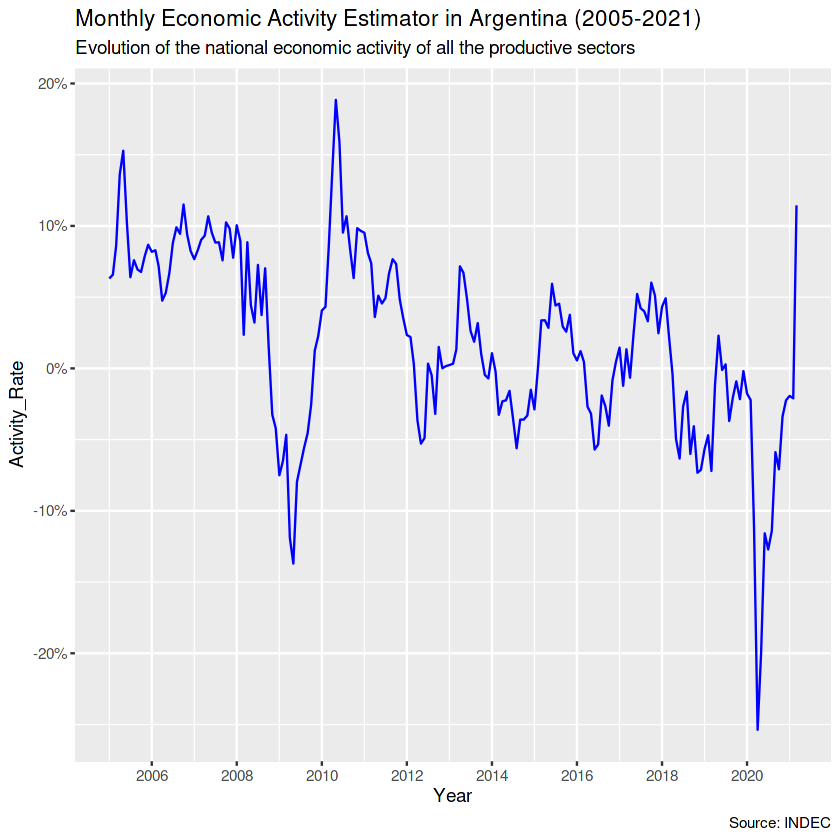

In [2]:
## Activity Rate: Some cleaning work, formatting dates, select, rename, and plot
head(activity_rate)

colnames(activity_rate)

activity_rate$indice_tiempo <- as.Date(activity_rate$indice_tiempo)

activity_rate <- rename(activity_rate, Year = indice_tiempo, Activity_Rate = emae_original_via ) %>%
  select(Year, Activity_Rate) %>%
  drop_na()

head(activity_rate)

ggplot(data = activity_rate) + 
  geom_line(mapping = aes(x = Year, y = Activity_Rate), color = 'blue') + 
  scale_x_date(date_labels="%Y",date_breaks  ="2 years") +
  scale_y_continuous(labels = scales::percent_format(accuracy = 1)) +
  labs(title = "Monthly Economic Activity Estimator in Argentina (2005-2021)", subtitle = "Evolution of the national economic activity of all the productive sectors", caption = "Source: INDEC") 

### As we can see, the evolution of the national economic activity in Argentina with a stable pattern,  did not growth in the last 16 years, with most of the values of the Activity Rate between -10% and +10% and a remarkable drop of 32% in 2020 due the pandemic.

indice_tiempo,eph_continua_tasa_desempleo_total,eph_continua_tasa_desempleo_total_gba,eph_continua_tasa_desempleo_total_cuyo,eph_continua_tasa_desempleo_total_nordeste,eph_continua_tasa_desempleo_total_noroeste,eph_continua_tasa_desempleo_total_region_pampeana,eph_continua_tasa_desempleo_total_patagonia,eph_continua_tasa_desempleo_total_caba,eph_continua_tasa_desempleo_total_partidos_gba,⋯,eph_continua_tasa_desempleo_total_gran_santa_fe,eph_continua_tasa_desempleo_total_rio_cuarto,eph_continua_tasa_desempleo_total_santa_rosa,eph_continua_tasa_desempleo_total_san_nicolas,eph_continua_tasa_desempleo_total_comodoro_rivadavia,eph_continua_tasa_desempleo_total_neuquen,eph_continua_tasa_desempleo_total_rio_gallegos,eph_continua_tasa_desempleo_total_ushuaia_rio_grande,eph_continua_tasa_desempleo_total_rawson_trelew,eph_continua_tasa_desempleo_total_viedma_carmen_patagones
<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2004-01-01,0.13520906,0.14360064,0.09550843,0.08711933,0.13858272,0.13779651,0.07583611,0.10249732,0.15790151,⋯,0.13378527,0.10784774,0.08570174,NA,0.08541441,0.07835899,0.01981689,0.09682176,NA,NA
2005-01-01,0.11510060,0.12723411,0.07553526,0.06290748,0.10894005,0.11132755,0.07126412,0.09086936,0.13985245,⋯,0.10340541,0.08444693,0.05649152,NA,0.08204230,0.07973746,0.01571843,0.07987537,NA,NA
2006-01-01,0.10088053,0.11099528,0.05732236,0.05989978,0.10124020,0.09726992,0.07690189,0.08270885,0.12059094,⋯,0.07596565,0.08605724,0.06400504,NA,0.06872593,0.09341702,0.03207864,0.07697054,NA,NA
2007-01-01,0.08399897,0.09139455,0.04753084,0.04906404,0.08887664,0.08681406,0.05793660,0.06791216,0.09954446,⋯,0.08585111,0.08807768,0.05595181,0.08059823,0.04515962,0.06357589,0.02103680,0.06925633,0.06546625,0.07619414
2008-01-01,0.07829543,0.08358066,0.04486532,0.04721551,0.08038104,0.08145604,0.06019815,0.05512093,0.09339920,⋯,0.10802963,0.07528601,0.04632194,0.07987346,0.04610749,0.07008067,0.01891028,0.05526826,0.06798176,0.09752547
2009-01-01,0.08639983,0.09065249,0.06423193,0.03947667,0.08174210,0.09403859,0.06975843,0.06766263,0.09154238,⋯,0.10993241,0.09249486,0.03578809,0.08256362,0.04441741,0.07511753,0.02776868,0.09532585,0.07142698,0.10735627


[1] "indice_tiempo"                                            
 [2] "eph_continua_tasa_desempleo_total"                        
 [3] "eph_continua_tasa_desempleo_total_gba"                    
 [4] "eph_continua_tasa_desempleo_total_cuyo"                   
 [5] "eph_continua_tasa_desempleo_total_nordeste"               
 [6] "eph_continua_tasa_desempleo_total_noroeste"               
 [7] "eph_continua_tasa_desempleo_total_region_pampeana"        
 [8] "eph_continua_tasa_desempleo_total_patagonia"              
 [9] "eph_continua_tasa_desempleo_total_caba"                   
[10] "eph_continua_tasa_desempleo_total_partidos_gba"           
[11] "eph_continua_tasa_desempleo_total_gran_mendoza"           
[12] "eph_continua_tasa_desempleo_total_gran_san_juan"          
[13] "eph_continua_tasa_desempleo_total_san_luis"               
[14] "eph_continua_tasa_desempleo_total_corrientes"             
[15] "eph_continua_tasa_desempleo_total_formosa"                
[16] "eph_continua_tasa_desempleo_total_gran_resistencia"       
[17] "eph_continua_tasa_desempleo_total_posadas"                
[18] "eph_continua_tasa_desempleo_total_gran_tucuman"           
[19] "eph_continua_tasa_desempleo_total_gran_catamarca"         
[20] "eph_continua_tasa_desempleo_total_jujuy"                  
[21] "eph_continua_tasa_desempleo_total_la_rioja"               
[22] "eph_continua_tasa_desempleo_total_salta"                  
[23] "eph_continua_tasa_desempleo_total_santiago_del_estero"    
[24] "eph_continua_tasa_desempleo_total_gran_cordoba"           
[25] "eph_continua_tasa_desempleo_total_gran_la_plata"          
[26] "eph_continua_tasa_desempleo_total_gran_rosario"           
[27] "eph_continua_tasa_desempleo_total_mar_del_plata"          
[28] "eph_continua_tasa_desempleo_total_concordia"              
[29] "eph_continua_tasa_desempleo_total_bahia_blanca"           
[30] "eph_continua_tasa_desempleo_total_gran_parana"            
[31] "eph_continua_tasa_desempleo_total_gran_santa_fe"          
[32] "eph_continua_tasa_desempleo_total_rio_cuarto"             
[33] "eph_continua_tasa_desempleo_total_santa_rosa"             
[34] "eph_continua_tasa_desempleo_total_san_nicolas"            
[35] "eph_continua_tasa_desempleo_total_comodoro_rivadavia"     
[36] "eph_continua_tasa_desempleo_total_neuquen"                
[37] "eph_continua_tasa_desempleo_total_rio_gallegos"           
[38] "eph_continua_tasa_desempleo_total_ushuaia_rio_grande"     
[39] "eph_continua_tasa_desempleo_total_rawson_trelew"          
[40] "eph_continua_tasa_desempleo_total_viedma_carmen_patagones"

Year,percentage
<date>,<dbl>
2004-01-01,0.13520906
2005-01-01,0.11510060
2006-01-01,0.10088053
2007-01-01,0.08399897
2008-01-01,0.07829543
2009-01-01,0.08639983


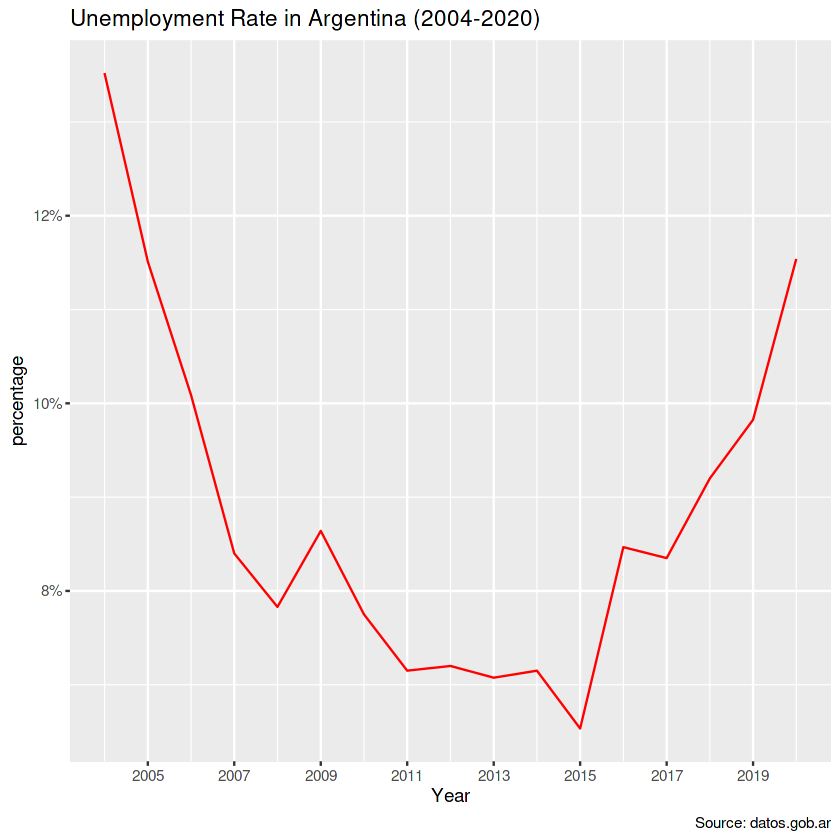

In [3]:
## Unemployment Rate: Similar work to the one done previously
head(unemployment_rate)

colnames(unemployment_rate)

unemployment_rate <- unemployment_rate %>%
  rename(Year = indice_tiempo, percentage = eph_continua_tasa_desempleo_total) %>%
  select(Year, percentage) %>%
  drop_na()

unemployment_rate$Year <- as.Date(unemployment_rate$Year)

head(unemployment_rate) 


ggplot(data = unemployment_rate) +
  geom_line(mapping = aes(x = Year, y = percentage, ), color = "red")+
  scale_x_date(date_labels="%Y",date_breaks  ="2 years") + 
  scale_y_continuous(labels = scales::percent_format(accuracy = 1)) +
  labs(title = "Unemployment Rate in Argentina (2004-2020)", caption = "Source: datos.gob.ar")

### In this graph we can observe a distinguished decrease in the unemployment rate from 2004 to 2015, and then grows again at an accelerated rate reaching values from the year 2005.

,Year,Activity_Rate,Unemployment_Rate
,<date>,<dbl>,<dbl>
1,2005-01-01,0.06311142,0.11510060
2,2006-01-01,0.08182506,0.10088053
3,2007-01-01,0.07669900,0.08399897
4,2008-01-01,0.10047908,0.07829543
5,2009-01-01,-0.07501154,0.08639983
6,2010-01-01,0.04065882,0.07750000


`geom_smooth()` using method = 'loess' and formula 'y ~ x'



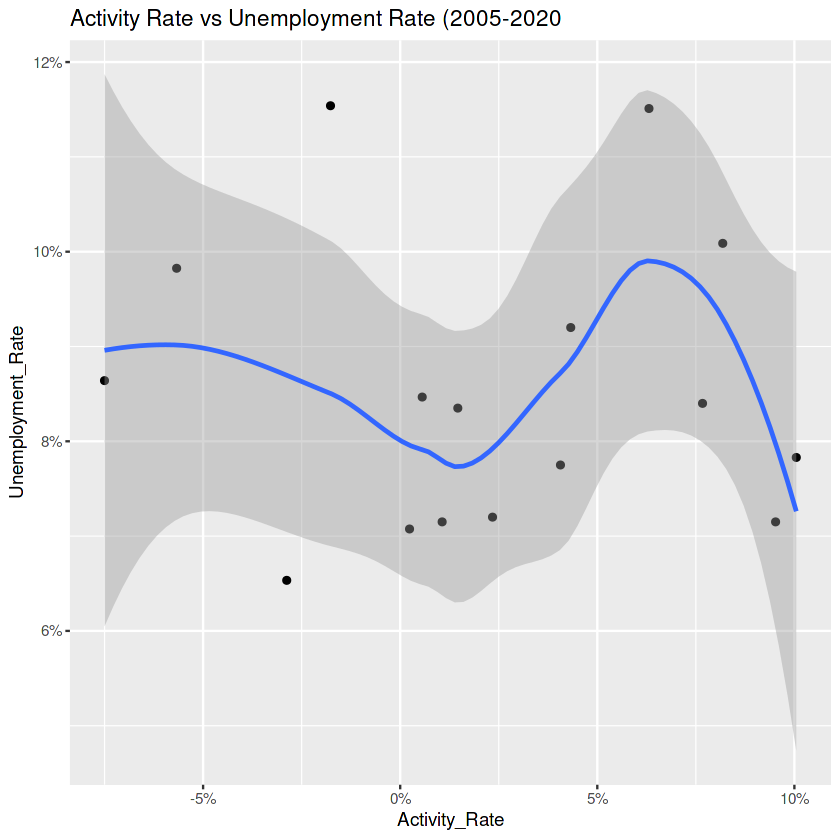

In [4]:
## Activity Rate vs Unemployment Rate: Inner join and then the plot
activity_vs_unemployment <- merge(x = activity_rate, y = unemployment_rate, by ="Year", all = TRUE)
  
activity_vs_unemployment <- activity_vs_unemployment %>%
  drop_na() %>%
  rename(Unemployment_Rate = percentage) %>%
  select(Year, Activity_Rate, Unemployment_Rate)

head(activity_vs_unemployment)

ggplot(data = activity_vs_unemployment) +
  geom_point(mapping = aes(x = Activity_Rate, y = Unemployment_Rate)) + 
  geom_smooth(mapping = aes(x = Activity_Rate, y = Unemployment_Rate)) +
  scale_x_continuous(labels = scales::percent_format(accuracy = 1)) +
  scale_y_continuous(labels = scales::percent_format(accuracy = 1)) +
  labs(title = "Activity Rate vs Unemployment Rate (2005-2020")

#### With the first view on the chart, we can assume that there is no relation between this two variables, but just in case, we are going to calculate the Pearson correlation to be sure.
#### The Pearson correlation says that the result can be between [-1, 1]. When the result is near to the extreme points, the correlation is strong, and when the result is near to 0, there is no correlation between the variables.

In [5]:
x <- activity_vs_unemployment$Activity_Rate
y <- activity_vs_unemployment$Unemployment_Rate

cor(x,y, method = "pearson")

[1] -0.02822284

#### With the Pearson correlation of -0.02822284, we can assure that there is no correlation in our data between Activity Rate and Unemployment Rate in Argentina between 2005 and 2020, so we cannot accept the hypothesis raised at the beginning of this work, which was: Activity Rate and Unemployment Rate are negatively related.


### Thanks to all who read the work. All the comments that allow me to improve this and other future works will be very well received.